In [1]:
import pandas as pd

In [2]:
cadastrados = pd.read_csv("https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/dd201a034223a16732c6f639b40600b26bd3129c/dados/clientes_cadastrados.csv")

In [3]:
cadastrados.head()

,ID_Cliente,Genero,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,1,0,0,0,Segurança,2.0
3,5008808,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0
4,5008809,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0


É possivel observar que existem alguns dados inconsistentes nessa base, um exemplo disso é a Idade negativa

In [4]:
print("Linhas: ",cadastrados.shape[0])
print("Colunas: ",cadastrados.shape[1])

Linhas:  438557
Colunas:  18


**Verificando Dados Duplicados**

In [5]:
#Verificar se tem ID duplicado

cadastrados.ID_Cliente.value_counts()

7137299    2
7702238    2
7282535    2
7243768    2
7050948    2
          ..
5690727    1
6621262    1
6621261    1
6621260    1
6842885    1
Name: ID_Cliente, Length: 438510, dtype: int64

In [6]:
cadastrados[cadastrados["ID_Cliente"].duplicated(keep=False)].shape


id_repetidos = cadastrados[cadastrados["ID_Cliente"].duplicated(keep=False)]

In [7]:
df_cadastrados_limpo = cadastrados.drop(id_repetidos.index)

In [8]:
df_cadastrados_limpo.ID_Cliente.value_counts()

5008804    1
6147691    1
6147689    1
6147688    1
6147685    1
          ..
6093492    1
5690720    1
6538938    1
6538937    1
6842885    1
Name: ID_Cliente, Length: 438463, dtype: int64

**Verificando dados nulos**

In [9]:
df_cadastrados_limpo.isna().sum()

ID_Cliente                    0
Genero                        0
Tem_carro                     0
Tem_casa_propria              0
Qtd_filhos                    0
Rendimento_anual              0
Categoria_de_renda            0
Grau_escolaridade             0
Estado_civil                  0
Moradia                       0
Idade                         0
Anos_empregado                0
Tem_celular                   0
Tem_telefone_trabalho         0
Tem_telefone_fixo             0
Tem_email                     0
Ocupacao                 134177
Tamanho_familia               0
dtype: int64

In [10]:
#analisando a coluna
df_cadastrados_limpo["Ocupacao"].unique()

array([nan, 'Segurança', 'Vendas', 'Contabilidade', 'Construção Civil',
       'Gerência', 'Motorista', 'Equipe principal', 'Alta tecnologia',
       'Limpeza', 'Serviço privado', 'Cozinha', 'Baixa qualificação',
       'Medicina', 'Secretariado', 'Garçom', 'RH', 'Corretor imobiliário',
       'TI'], dtype=object)

Os dados nulos são muito provavelmente são Outras profissões

In [11]:
#Subistituindo os valores vazios 
df_cadastrados_limpo["Ocupacao"].fillna("Outros", inplace = True)

In [12]:
df_cadastrados_limpo.isna().sum()

ID_Cliente               0
Genero                   0
Tem_carro                0
Tem_casa_propria         0
Qtd_filhos               0
Rendimento_anual         0
Categoria_de_renda       0
Grau_escolaridade        0
Estado_civil             0
Moradia                  0
Idade                    0
Anos_empregado           0
Tem_celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_familia          0
dtype: int64

**Verificando dados unicos**

In [13]:
df_cadastrados_limpo.nunique()

ID_Cliente               438463
Genero                        2
Tem_carro                     2
Tem_casa_propria              2
Qtd_filhos                   12
Rendimento_anual            866
Categoria_de_renda            5
Grau_escolaridade             5
Estado_civil                  5
Moradia                       6
Idade                     16379
Anos_empregado             9406
Tem_celular                   1
Tem_telefone_trabalho         2
Tem_telefone_fixo             2
Tem_email                     2
Ocupacao                     19
Tamanho_familia              13
dtype: int64

In [14]:
#Removendo a coluna de Genero -- Não interfere na analise de credito de uma pessoa
df_cadastrados_limpo.drop("Genero", axis = 1, inplace = True)
#Removendo a coluna tem_celular -- Só existe um valor
df_cadastrados_limpo.drop("Tem_celular", axis = 1, inplace = True)


**Verificando algumas colunas**

In [15]:
df_cadastrados_limpo["Tem_carro"].unique()

array(['Y', 'N'], dtype=object)

In [16]:
df_cadastrados_limpo["Tem_casa_propria"].unique()

array(['Y', 'N'], dtype=object)

In [17]:
df_cadastrados_limpo["Tem_telefone_trabalho"].unique()

array([1, 0], dtype=int64)

In [18]:
df_cadastrados_limpo["Tem_telefone_fixo"].unique()

array([0, 1], dtype=int64)

In [19]:
df_cadastrados_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Tem_carro              438463 non-null  object 
 2   Tem_casa_propria       438463 non-null  object 
 3   Qtd_filhos             438463 non-null  int64  
 4   Rendimento_anual       438463 non-null  float64
 5   Categoria_de_renda     438463 non-null  object 
 6   Grau_escolaridade      438463 non-null  object 
 7   Estado_civil           438463 non-null  object 
 8   Moradia                438463 non-null  object 
 9   Idade                  438463 non-null  int64  
 10  Anos_empregado         438463 non-null  int64  
 11  Tem_telefone_trabalho  438463 non-null  int64  
 12  Tem_telefone_fixo      438463 non-null  int64  
 13  Tem_email              438463 non-null  int64  
 14  Ocupacao               438463 non-nu

In [20]:
#Subistituindo os valores por numeros
df_cadastrados_limpo["Tem_carro"] = df_cadastrados_limpo["Tem_carro"].replace(['Y',"N"],[1,0])

df_cadastrados_limpo["Tem_casa_propria"] = df_cadastrados_limpo["Tem_casa_propria"].replace(['Y',"N"],[1,0])

In [21]:
df_cadastrados_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Tem_carro              438463 non-null  int64  
 2   Tem_casa_propria       438463 non-null  int64  
 3   Qtd_filhos             438463 non-null  int64  
 4   Rendimento_anual       438463 non-null  float64
 5   Categoria_de_renda     438463 non-null  object 
 6   Grau_escolaridade      438463 non-null  object 
 7   Estado_civil           438463 non-null  object 
 8   Moradia                438463 non-null  object 
 9   Idade                  438463 non-null  int64  
 10  Anos_empregado         438463 non-null  int64  
 11  Tem_telefone_trabalho  438463 non-null  int64  
 12  Tem_telefone_fixo      438463 non-null  int64  
 13  Tem_email              438463 non-null  int64  
 14  Ocupacao               438463 non-nu

**Resolvendo o Problema da Idade e anos empregados**

Dentro do desafio no Kaggle é informado que é uma contagem descrescente de dias, ou seja -1 é o dia anterior

In [22]:
df_cadastrados_limpo["Idade"] = - df_cadastrados_limpo["Idade"]/365.2445

df_cadastrados_limpo["Anos_empregado"] = - df_cadastrados_limpo["Anos_empregado"]/365.2445

In [23]:
df_cadastrados_limpo["Anos_empregado"].value_counts()

-999.995893    75314
 0.596860        262
 4.594183        251
 0.681735        241
 2.677658        240
               ...  
 37.040941         1
 27.989470         1
 24.413783         1
 31.291368         1
 22.190615         1
Name: Anos_empregado, Length: 9406, dtype: int64

esses: -999.995893    75314  --> São as Pessoas Desempregadas

Devemos fazer a mudança dentro do Df para não gerar um problema no modelo

In [24]:
df_cadastrados_limpo.loc[df_cadastrados_limpo["Anos_empregado"]<0,"Anos_empregado"] = 0

In [25]:
df_cadastrados_limpo["Anos_empregado"].value_counts()

0.000000     75314
0.596860       262
4.594183       251
0.681735       241
2.677658       240
             ...  
37.040941        1
27.989470        1
24.413783        1
31.291368        1
22.190615        1
Name: Anos_empregado, Length: 9406, dtype: int64

**Verificando a Correlação entre os dados**

In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [27]:
corr = df_cadastrados_limpo.corr()

C:\Users\FADEL\AppData\Local\Temp\ipykernel_18316\867935434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_cadastrados_limpo.corr()


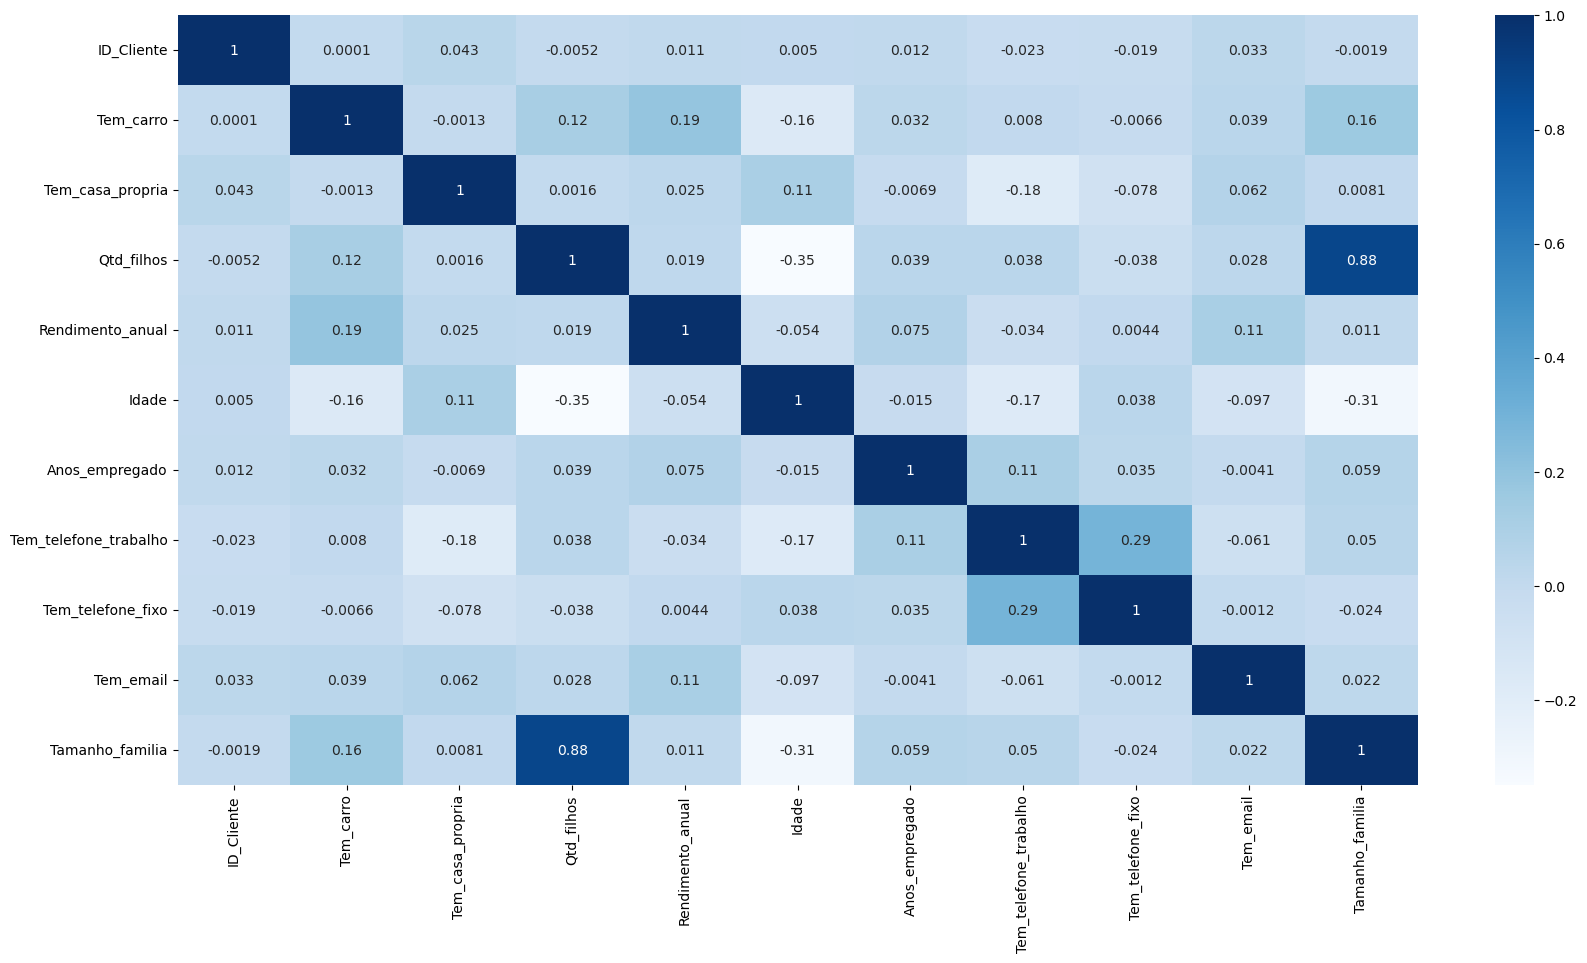

In [28]:
plt.figure(figsize = (20,10))

sns.heatmap(corr,cmap = "Blues", annot = True);



Qtd_filhos e Tamanha_Familia estão muito correlacionados e isso pode influenciar no modelo com Overfitting

Será preciso retirar uma das colunas

In [29]:
df_cadastrados_limpo.drop("Qtd_filhos", axis = 1, inplace = True)

In [30]:
df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868394,12.435506,1,0,0,Outros,2.0
1,5008805,1,1,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,32.868394,12.435506,1,0,0,Outros,2.0
2,5008806,1,1,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,58.793493,3.104770,0,0,0,Segurança,2.0
3,5008808,0,1,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321116,8.353309,0,1,1,Vendas,1.0
4,5008809,0,1,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,52.321116,8.353309,0,1,1,Vendas,1.0


**Organizando as Colunas**

In [31]:
df_cadastrados_limpo = df_cadastrados_limpo[["ID_Cliente","Tem_carro","Tem_casa_propria",
                                             "Tem_telefone_trabalho","Tem_telefone_fixo",
                                            "Tem_email","Tamanho_familia","Rendimento_anual",
                                            "Idade","Anos_empregado","Categoria_de_renda",
                                            "Grau_escolaridade","Estado_civil","Moradia",
                                            "Ocupacao"]]

In [32]:
df_cadastrados_limpo.head(3)

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao
0,5008804,1,1,1,0,0,2.0,427500.0,32.868394,12.435506,Empregado,Ensino superior,União-estável,Apartamento alugado,Outros
1,5008805,1,1,1,0,0,2.0,427500.0,32.868394,12.435506,Empregado,Ensino superior,União-estável,Apartamento alugado,Outros
2,5008806,1,1,0,0,0,2.0,112500.0,58.793493,3.104770,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança


# **Analise Exploratoria**

In [33]:

Categoria = df_cadastrados_limpo["Categoria_de_renda"].value_counts(normalize = True)*100
Categoria

Empregado              51.557144
Associado comercial    22.972520
Pensionista            17.214223
Servidor público        8.252236
Estudante               0.003877
Name: Categoria_de_renda, dtype: float64

In [34]:
Categoria = pd.DataFrame(Categoria)
Categoria.reset_index(inplace = True)
Categoria.columns = ["Classe","Percentual"]

In [35]:
def grafico_barras(data,x,y):
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.barplot(x=x, y= y, data= data, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    for p in ax.patches:
            ax.annotate(format(p.get_height(), '.2f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')
    plt.show()
    

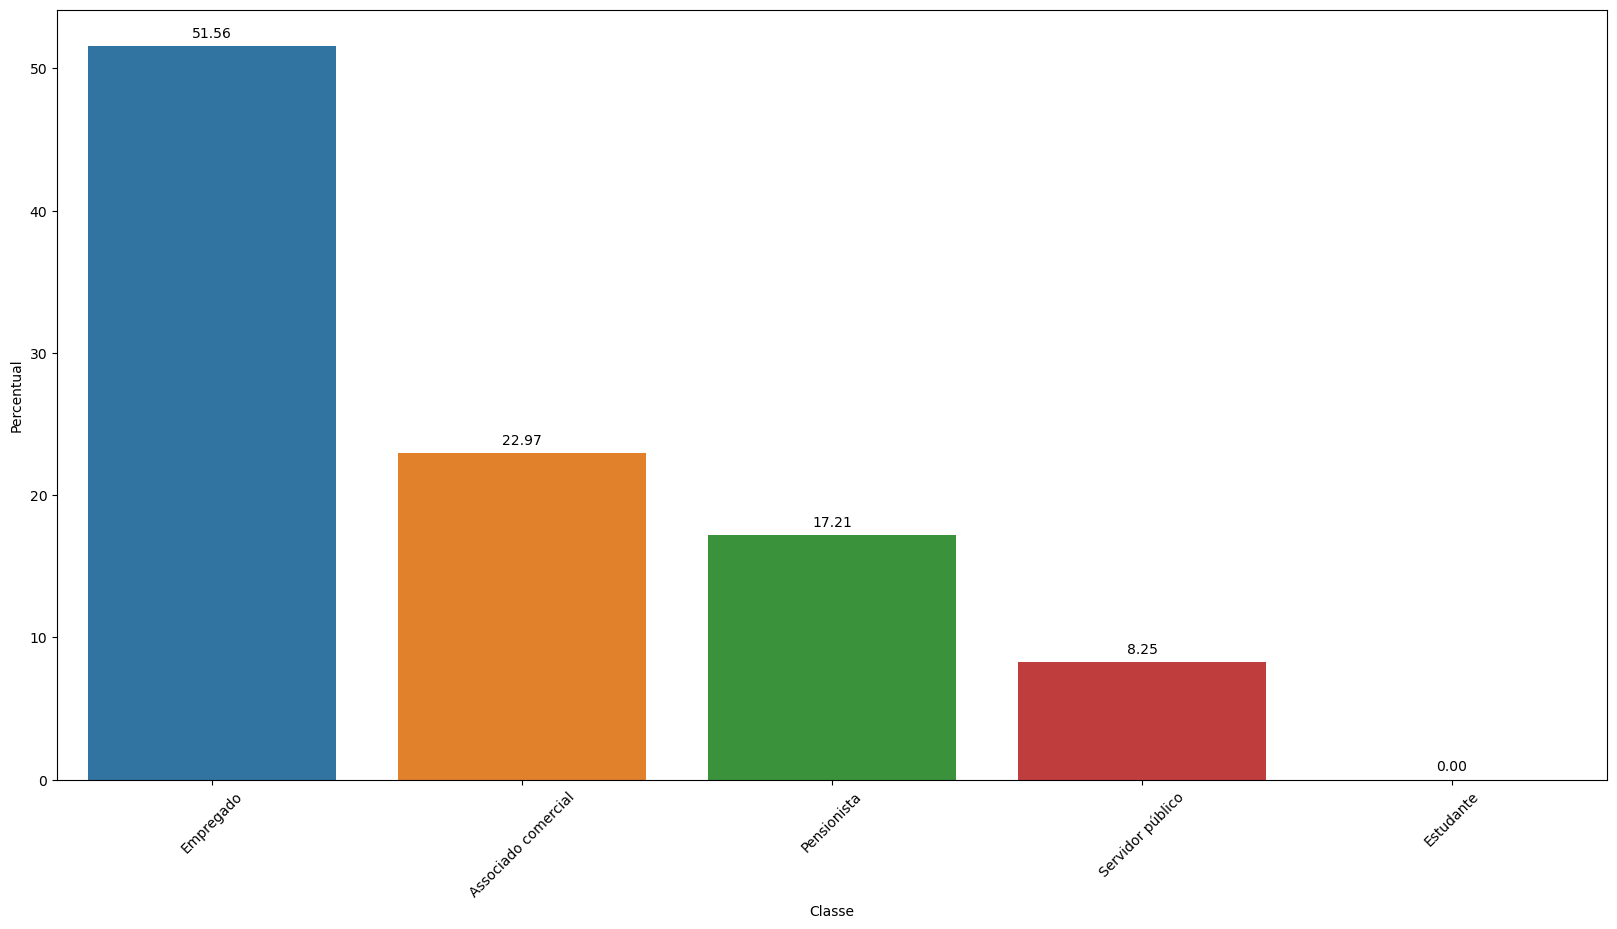

In [36]:

grafico_barras(Categoria,"Classe","Percentual")


In [37]:
Categoria = df_cadastrados_limpo["Categoria_de_renda"].value_counts(normalize = True)*100
Categoria

Empregado              51.557144
Associado comercial    22.972520
Pensionista            17.214223
Servidor público        8.252236
Estudante               0.003877
Name: Categoria_de_renda, dtype: float64

In [38]:
casa_propria = df_cadastrados_limpo["Tem_casa_propria"].value_counts(normalize = True)*100
casa_propria = pd.DataFrame(casa_propria)
casa_propria.reset_index(inplace = True)
casa_propria.columns = ["Classe","Percentual"]

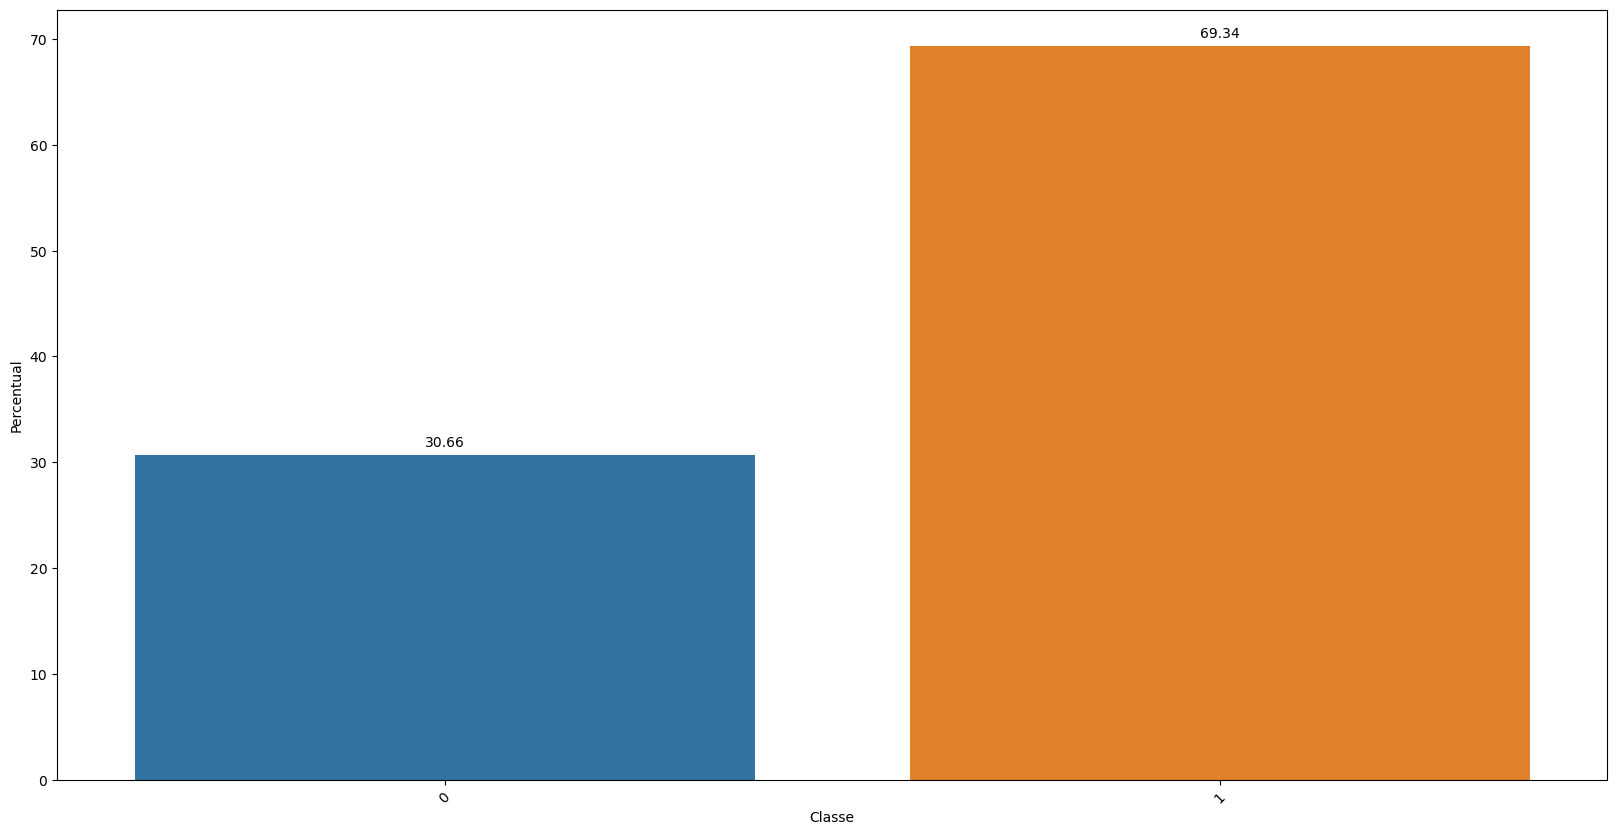

In [39]:
grafico_barras(casa_propria,"Classe","Percentual")


In [40]:
df_cadastrados_limpo.groupby('Tem_casa_propria')["Rendimento_anual"].mean().round(2)/12

Tem_casa_propria
0    15276.000833
1    15781.997500
Name: Rendimento_anual, dtype: float64

In [41]:
#Escolaridade
escolaridade = df_cadastrados_limpo["Grau_escolaridade"].value_counts(normalize = True)*100
escolaridade = pd.DataFrame(escolaridade)
escolaridade.reset_index(inplace = True)
escolaridade.columns = ["Classe","Percentual"]


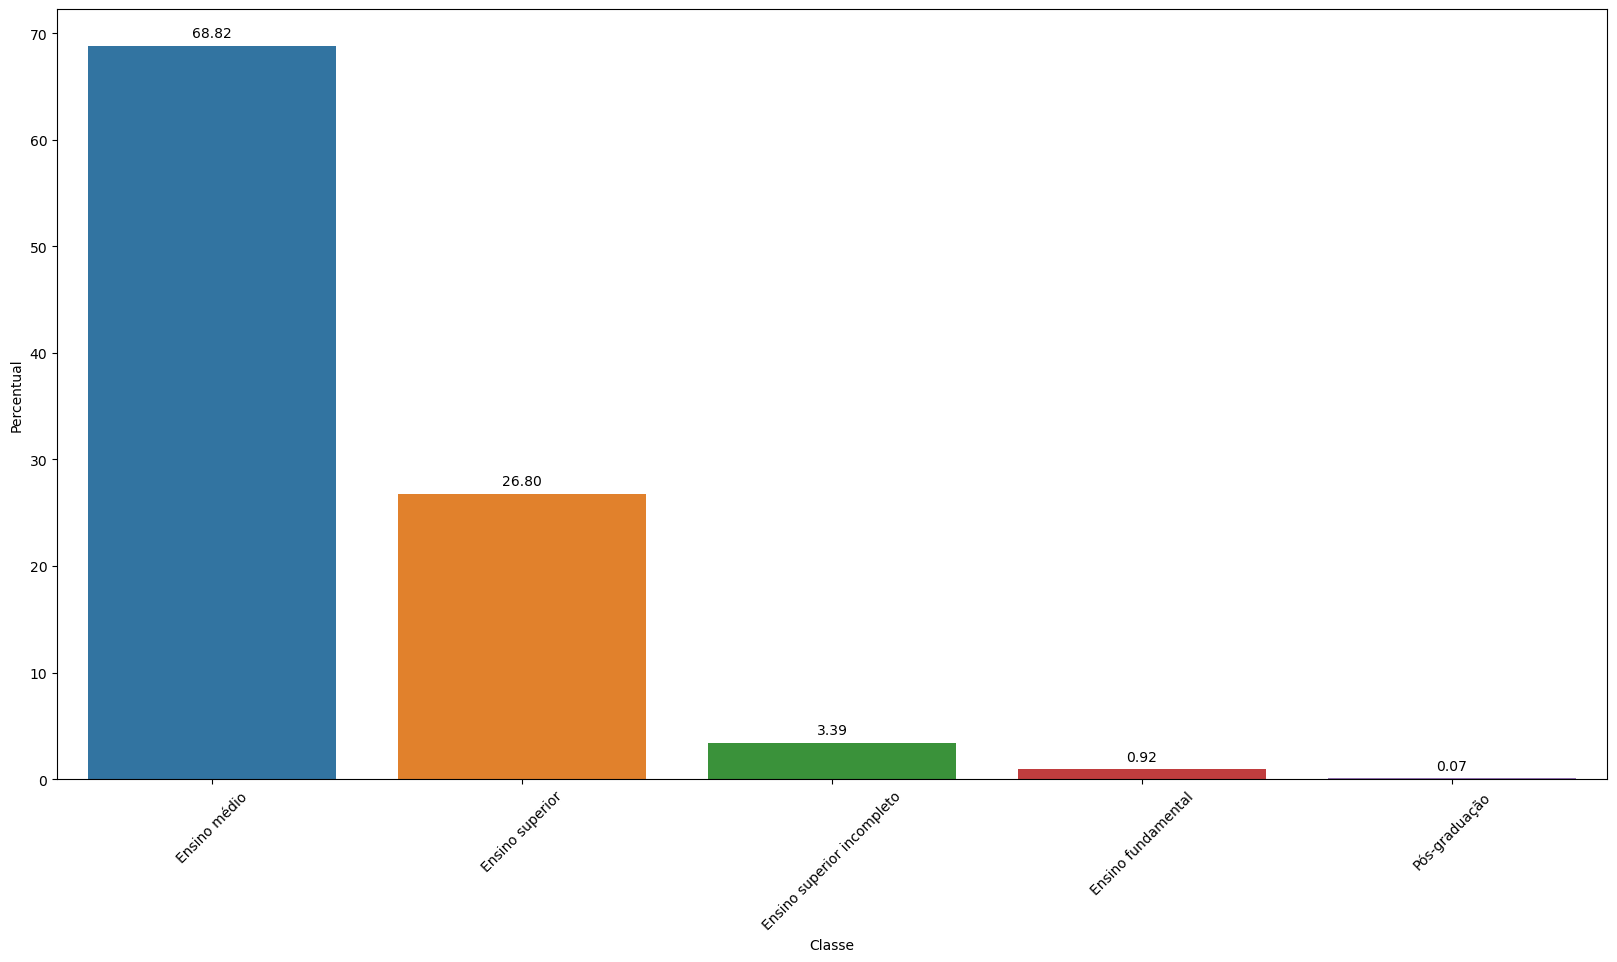

In [42]:
grafico_barras(escolaridade,"Classe","Percentual")

**A Grande maioria tem só o Ensino Médio Completo**

In [43]:
df_cadastrados_limpo.columns

Index(['ID_Cliente', 'Tem_carro', 'Tem_casa_propria', 'Tem_telefone_trabalho',
       'Tem_telefone_fixo', 'Tem_email', 'Tamanho_familia', 'Rendimento_anual',
       'Idade', 'Anos_empregado', 'Categoria_de_renda', 'Grau_escolaridade',
       'Estado_civil', 'Moradia', 'Ocupacao'],
      dtype='object')

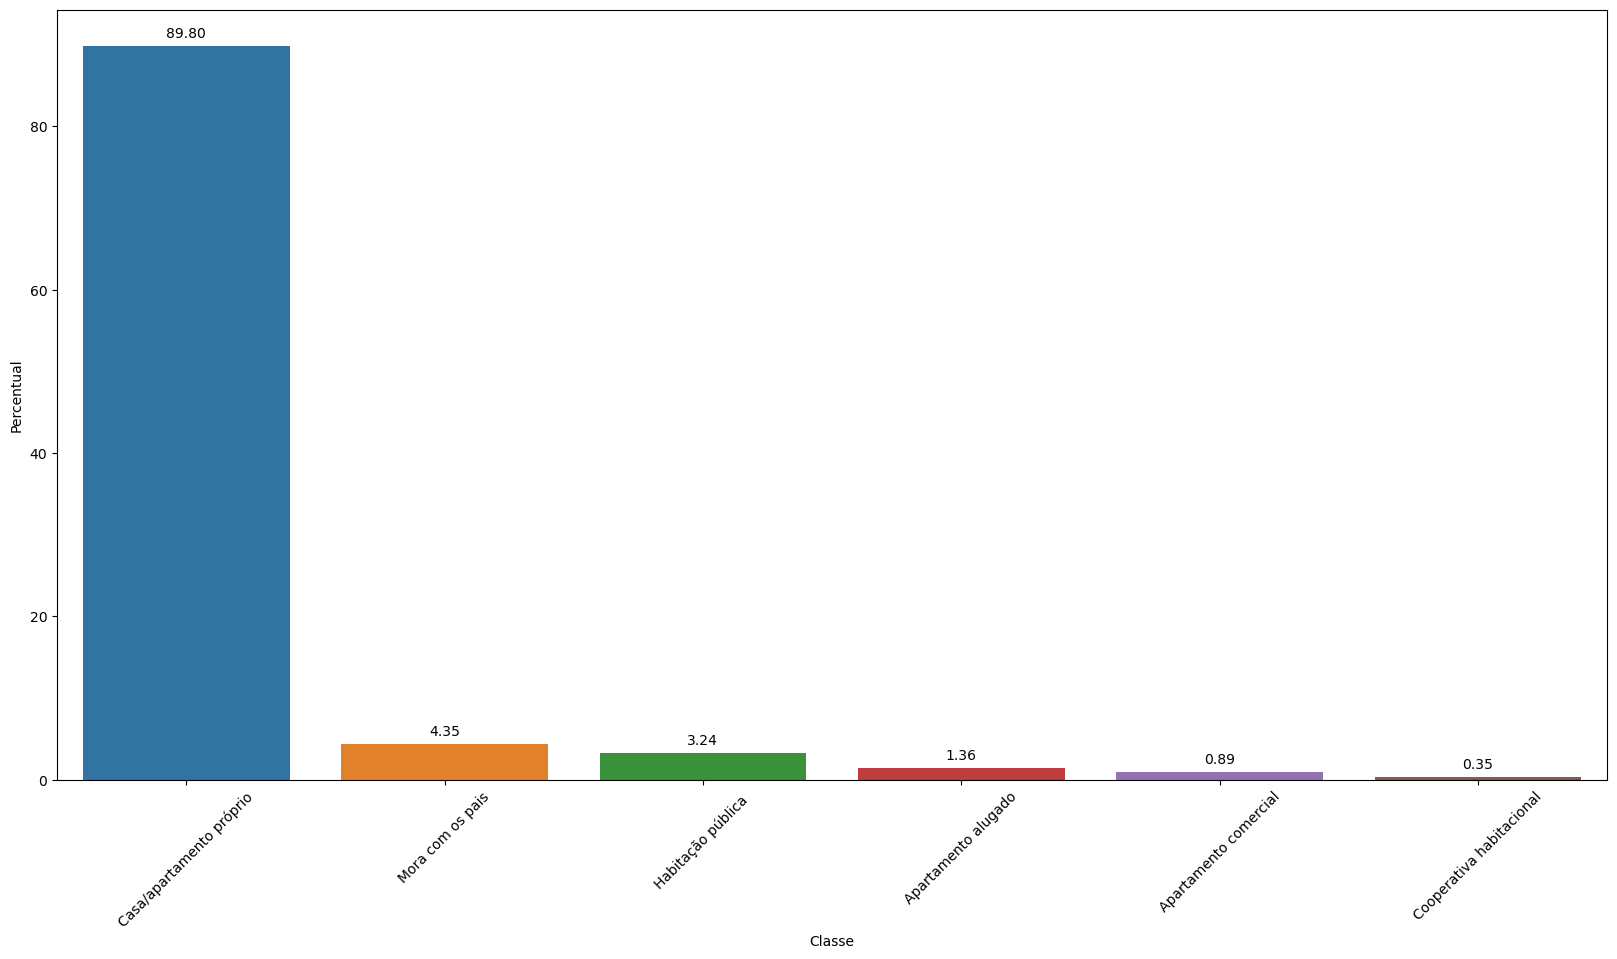

In [44]:
#Escolaridade
moradia = df_cadastrados_limpo["Moradia"].value_counts(normalize = True)*100
moradia = pd.DataFrame(moradia)
moradia.reset_index(inplace = True)
moradia.columns = ["Classe","Percentual"]

grafico_barras(moradia,"Classe","Percentual")



**A grande maioria das pessoas tem casa propria -- Dados que batem com o outro gráfico**

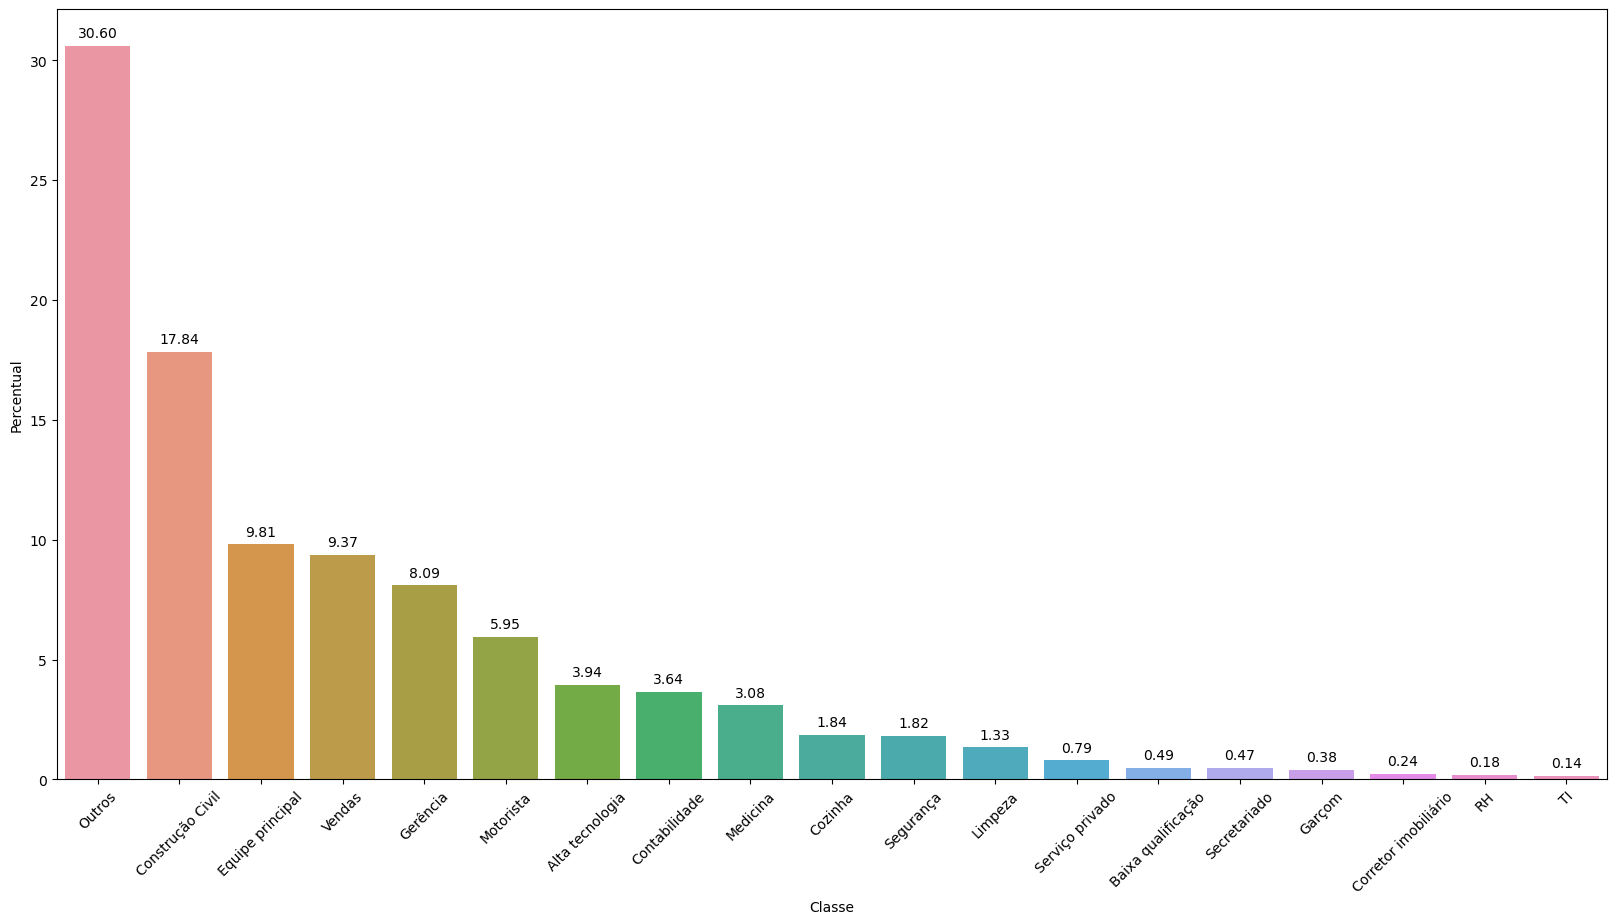

In [45]:

#Escolaridade
Ocupacao = df_cadastrados_limpo["Ocupacao"].value_counts(normalize = True)*100
Ocupacao = pd.DataFrame(Ocupacao)
Ocupacao.reset_index(inplace = True)
Ocupacao.columns = ["Classe","Percentual"]

grafico_barras(Ocupacao,"Classe","Percentual")




In [46]:
print("Quantidade das pessoas que tem carro: ",round(df_cadastrados_limpo.Tem_carro.value_counts()[1]/len(df_cadastrados_limpo),2))
print("Quantidade das pessoas que não tem carro: ",round(df_cadastrados_limpo.Tem_carro.value_counts()[0]/len(df_cadastrados_limpo),2))

Quantidade das pessoas que tem carro:  0.37
Quantidade das pessoas que não tem carro:  0.63


In [47]:
round(df_cadastrados_limpo.Tamanho_familia.value_counts()/len(df_cadastrados_limpo),2)

2.0     0.53
1.0     0.19
3.0     0.18
4.0     0.09
5.0     0.01
6.0     0.00
7.0     0.00
9.0     0.00
11.0    0.00
14.0    0.00
8.0     0.00
15.0    0.00
20.0    0.00
Name: Tamanho_familia, dtype: float64

# Base de Aprovados

In [48]:
aprovados = pd.read_csv("https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/dd201a034223a16732c6f639b40600b26bd3129c/dados/clientes_aprovados.csv")

In [49]:
aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [50]:
aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [51]:
aprovados.query("ID_Cliente == 5001712")

,ID_Cliente,Mes_referencia,Faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


In [52]:
aprovados.query("ID_Cliente == 5001711")

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


In [53]:
aprovados.Faixa_atraso.value_counts()

pagamento realizado    442031
1-29 dias              383120
nenhum empréstimo      209230
30-59 dias              11090
>150 dias                1693
60-89 dias                868
90-119 dias               320
120-149 dias              223
Name: Faixa_atraso, dtype: int64

**Tempo de Abertura e encerramento da conta**

In [54]:
df_registros_credito_agrupados_ID = aprovados.groupby("ID_Cliente")
#Pega o menor Mês e define como abertura
ser_abertura = df_registros_credito_agrupados_ID.apply(lambda x: min(x["Mes_referencia"]))
ser_abertura.name = 'Abertura'

In [55]:
df_clientes_aprovados = aprovados.merge(ser_abertura, on = "ID_Cliente")
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


In [56]:
#Pega o maior mês e define como Final
ser_final = df_registros_credito_agrupados_ID.apply(lambda x: max(x["Mes_referencia"]))
ser_final.name = 'final'


df_clientes_aprovados = df_clientes_aprovados.merge(ser_final, on = "ID_Cliente")
df_clientes_aprovados.head()


,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


In [57]:
#Criando a Janela
df_clientes_aprovados["Janela"] = (df_clientes_aprovados["final"] - df_clientes_aprovados["Abertura"])
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,final,Janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


**MOB - Month on Book**

É a quantidade de meses que faltam para o cliente zerar o **Emprestimo**

In [58]:
df_clientes_aprovados["MOB"] = df_clientes_aprovados["Mes_referencia"] - df_clientes_aprovados["Abertura"]

In [59]:
df_clientes_aprovados.Faixa_atraso.unique()

array(['nenhum empréstimo', '1-29 dias', 'pagamento realizado',
       '30-59 dias', '60-89 dias', '90-119 dias', '120-149 dias',
       '>150 dias'], dtype=object)

In [60]:
dict_faixa_atraso_ind = {'nenhum empréstimo':0,'pagamento realizado':1, '1-29 dias':2,
       '30-59 dias':3, '60-89 dias':4, '90-119 dias':5, '120-149 dias':6,
       '>150 dias':7}

In [61]:
df_clientes_aprovados["Ind_Faixa_atraso"] = df_clientes_aprovados.Faixa_atraso.map(dict_faixa_atraso_ind)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,final,Janela,MOB,Ind_Faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


In [62]:
df_clientes_aprovados["Mau"] = df_clientes_aprovados.apply(lambda x: 1 if x["Ind_Faixa_atraso"]>3 else 0, axis = 1)

In [63]:
df_registros_creditos_ID = df_clientes_aprovados[['ID_Cliente','Abertura',
                                                  'final','Janela']].groupby('ID_Cliente').apply(lambda x: x.iloc[0]).reset_index(drop = True)

In [64]:
df_registros_creditos_ID

,ID_Cliente,Abertura,final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


In [65]:
df_denominador = df_registros_creditos_ID.groupby("Abertura").apply(lambda x: x['ID_Cliente'].count()).reset_index()
df_denominador.columns = ["Abertura",'Qtd_Clientes']
df_denominador

,Abertura,Qtd_Clientes
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


In [66]:
df_vintage = df_clientes_aprovados.groupby(['Abertura',"MOB"]).apply(lambda x: x["ID_Cliente"].count()).reset_index()
df_vintage.columns = ['Abertura','MOB','Qtd_Clientes']
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


In [67]:
df_vintage = pd.merge(df_vintage[['Abertura','MOB']], df_denominador,
                     on = 'Abertura',how = 'left')

In [68]:
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415
...,...,...,...
1886,-2,1,771
1887,-2,2,771
1888,-1,0,686
1889,-1,1,686


In [69]:
import numpy as np

In [78]:

df_vintage['Qtd_Mau'] = np.nan

for j in range(-60,1):
    ls = []
    for i in range(0,61):
        due = list(df_clientes_aprovados.query('Mau == 1 and MOB == @i and Abertura == @j')['ID_Cliente'])
        ls.extend(due)
        df_vintage.loc[(df_vintage['MOB'] == i) & (df_vintage['Abertura'] == j), 'Qtd_Mau'] = len(set(ls))
        
df_vintage['Taxa_de_Mau']  = df_vintage['Qtd_Mau'] / df_vintage['Qtd_Clientes']
df_vintage    

,Abertura,MOB,Qtd_Clientes,Qtd_Mau,QTD_Mau,Taxa_de_Mau
0,-60,0,415,0.0,0.0,0.000000
1,-60,1,415,0.0,0.0,0.000000
2,-60,2,415,0.0,0.0,0.000000
3,-60,3,415,0.0,0.0,0.000000
4,-60,4,415,0.0,0.0,0.000000
...,...,...,...,...,...,...
1886,-2,1,771,0.0,0.0,0.000000
1887,-2,2,771,1.0,1.0,0.001297
1888,-1,0,686,0.0,0.0,0.000000
1889,-1,1,686,0.0,0.0,0.000000


In [79]:
df_vintage_pivot = df_vintage.pivot(index = 'Abertura',
                                   columns = 'MOB',
                                   values = 'Taxa_de_Mau')

In [80]:
df_vintage_pivot

MOB,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Abertura,,,,,,,,,,,,,,,,,,,,,
-60,0.0,0.0,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,...,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.0,0.0,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,...,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.0,0.0,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.0,0.0,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,...,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4,0.0,0.0,0.000000,0.003432,0.003432,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3,0.0,0.0,0.001088,0.001088,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2,0.0,0.0,0.001297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


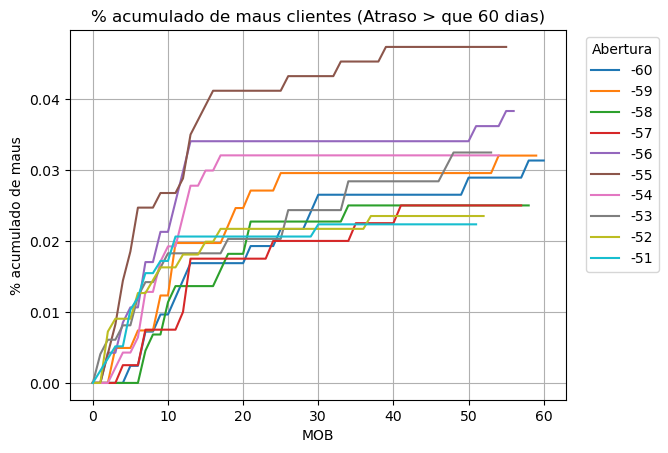

In [83]:
lst = [i for i in range(0,61)]
df_vintage_pivot[lst].T.iloc[:,:10].plot(legend = True, grid = True, title = '% acumulado de maus clientes (Atraso > que 60 dias)')

plt.xlabel('MOB')
plt.ylabel('% acumulado de maus')
plt.legend(bbox_to_anchor=(1.2, 1), title='Abertura')
plt.show()

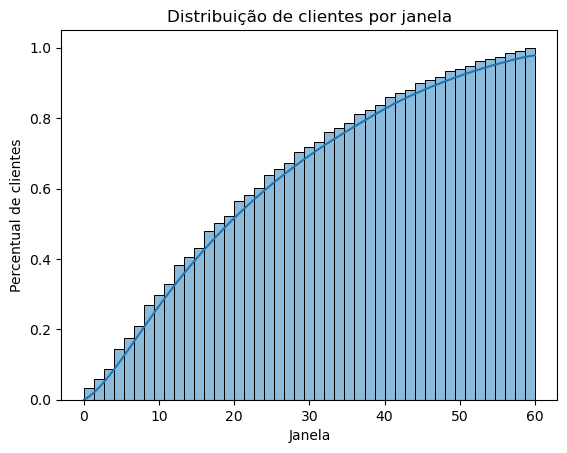

In [86]:
sns.histplot(data = df_registros_creditos_ID, x = 'Janela', cumulative = True, stat = 'density', kde = True)
plt.title('Distribuição de clientes por janela')
plt.xlabel('Janela')
plt.ylabel('Percentual de clientes')
plt.show()

In [87]:
dict_intervalo_atraso = {'maior_30_dias': 3,'maior_60_dias':4,'maior_90_dias':5,
                        'maior_120_dias':6,'maior_30_dias':7}

In [90]:

for chave, valor in dict_intervalo_atraso.items():
  df_clientes_aprovados[f'Mau_{chave}'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] >= valor else 0, axis=1) # mais de 60
df_clientes_aprovados.head()
     

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,final,Janela,MOB,Ind_Faixa_atraso,Mau,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0


In [92]:

dict_taxa_mau = {}
id_sum = len(set(df_clientes_aprovados['ID_Cliente']))

for chave in dict_intervalo_atraso.keys():
  df_min_mau = df_clientes_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
  df_mob_taxa_mau = pd.DataFrame({'MOB':range(0,61), 'Taxa_Mau': np.nan})
  lst = []
  for i in range(0,61):
      due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
      lst.extend(due) #cumsum
      df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_Mau'] = len(set(lst)) / id_sum
  dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_Mau']

df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau
     

,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias
0,0.000022,0.000022,0.000022,0.000022
1,0.000087,0.000174,0.000087,0.000087
2,0.000174,0.001153,0.000196,0.000174
3,0.000304,0.002240,0.000696,0.000304
4,0.000348,0.003392,0.001044,0.000696
...,...,...,...,...
56,0.004219,0.014483,0.007176,0.005263
57,0.004219,0.014483,0.007176,0.005263
58,0.004241,0.014505,0.007198,0.005284
59,0.004241,0.014505,0.007198,0.005284


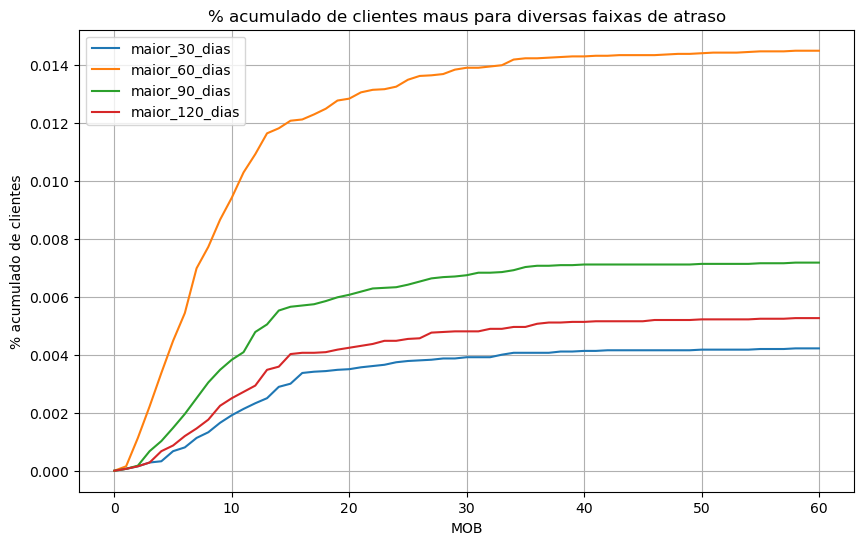

In [93]:

df_taxa_mau.plot(grid = True, title = '% acumulado de clientes maus para diversas faixas de atraso', figsize=(10, 6))
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')
plt.show()

In [94]:
df_clientes_aprovados_tratamento1 = df_clientes_aprovados.query('Janela > =12')

In [96]:
df_clientes_aprovados_tratamento1["Faixa_atraso"].unique()

array(['pagamento realizado', '1-29 dias', 'nenhum empréstimo',
       '30-59 dias', '60-89 dias', '90-119 dias', '120-149 dias',
       '>150 dias'], dtype=object)

In [97]:
def verifica(registros):
    lista_status = registros['Faixa_atraso'].to_list()
    if '60-89 dias' in lista_status or '90-119 dias' in lista_status or '120-149 dias' in lista_status or '>150 dias' in lista_status:
        return 1
    else:
        return 0
    
df_registros_creditos_id = pd.DataFrame(df_clientes_aprovados_tratamento1.groupby("ID_Cliente").apply(verifica)).reset_index()


df_registros_creditos_id.columns = ["ID_Cliente","Mau"]

In [101]:
df_registros_creditos_id.head()

,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


In [103]:
df_registros_clientes_targets = df_cadastrados_limpo.merge(df_registros_creditos_id, on = "ID_Cliente")

In [104]:
df_registros_clientes_targets

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao,Mau
0,5008804,1,1,1,0,0,2.0,427500.0,32.868394,12.435506,Empregado,Ensino superior,União-estável,Apartamento alugado,Outros,0
1,5008805,1,1,1,0,0,2.0,427500.0,32.868394,12.435506,Empregado,Ensino superior,União-estável,Apartamento alugado,Outros,0
2,5008806,1,1,0,0,0,2.0,112500.0,58.793493,3.104770,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança,0
3,5008810,0,1,0,1,1,1.0,270000.0,52.321116,8.353309,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas,0
4,5008811,0,1,0,1,1,1.0,270000.0,52.321116,8.353309,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23414,5149729,1,1,0,0,0,2.0,90000.0,52.296475,4.711912,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Outros,1
23415,5149775,1,1,0,1,0,2.0,130500.0,44.181363,25.711544,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Construção Civil,1
23416,5149834,0,1,0,1,1,2.0,157500.0,33.914268,3.627707,Associado comercial,Ensino superior,Casado,Casa/apartamento próprio,Medicina,1
23417,5149838,0,1,0,1,1,2.0,157500.0,33.914268,3.627707,Pensionista,Ensino superior,Casado,Casa/apartamento próprio,Medicina,1


In [106]:
df_registros_clientes_targets.Mau.value_counts(normalize = True) * 100

0    97.71126
1     2.28874
Name: Mau, dtype: float64